# Houston Property Tax Data Exploration

We will work on Harris County Appraisal District (HCAD) real property dataset. This database has more than 1 million records. It consists of multiple tables covering features such as property size, market value, number of bedrooms, name of owners and etc.

Because of the size limit we will focus only on properties located in zip code 77079 and look closer at features such as values, number of bedrooms, type of properties, ownership duration etc.
HCAD data is used for actual annual property tax calculation for all real properties in Houston, Texas. And because the property tax is the main revenue source for Houston city, we can assume that it contains almost all habitable or useful real estate properties in Harris county.

The disadvantage of focusing only on one zip code is that we may not be able to transfer all conclusions to other real estate properties located in other zip codes. This is especially important as real estate is typically a custom product subject o its specific usage, owners’ interests, original developer’s plan, environmental situations and many more.

# Analytic Questions

## Question 1: Is there a value premium associated to residential buildings on oversized lot?
### Possible indicator: What is the building to land size ratio and does it vary with total market value usd/sqf?

## Question 2. Is there a value discount for residential properties when located in proximity to multifamily apartment complexes?
### Possible indicator: Total market value usd/sqf within a map facet shared between a private and commercial multifamily building.

## Question 3: Do the sizes of properties or their values varies between those occupied by owners veruse occupied by tenants?
### Possible indicator: Linear relationship between building and value size w.r.t owner and tenant occupied.

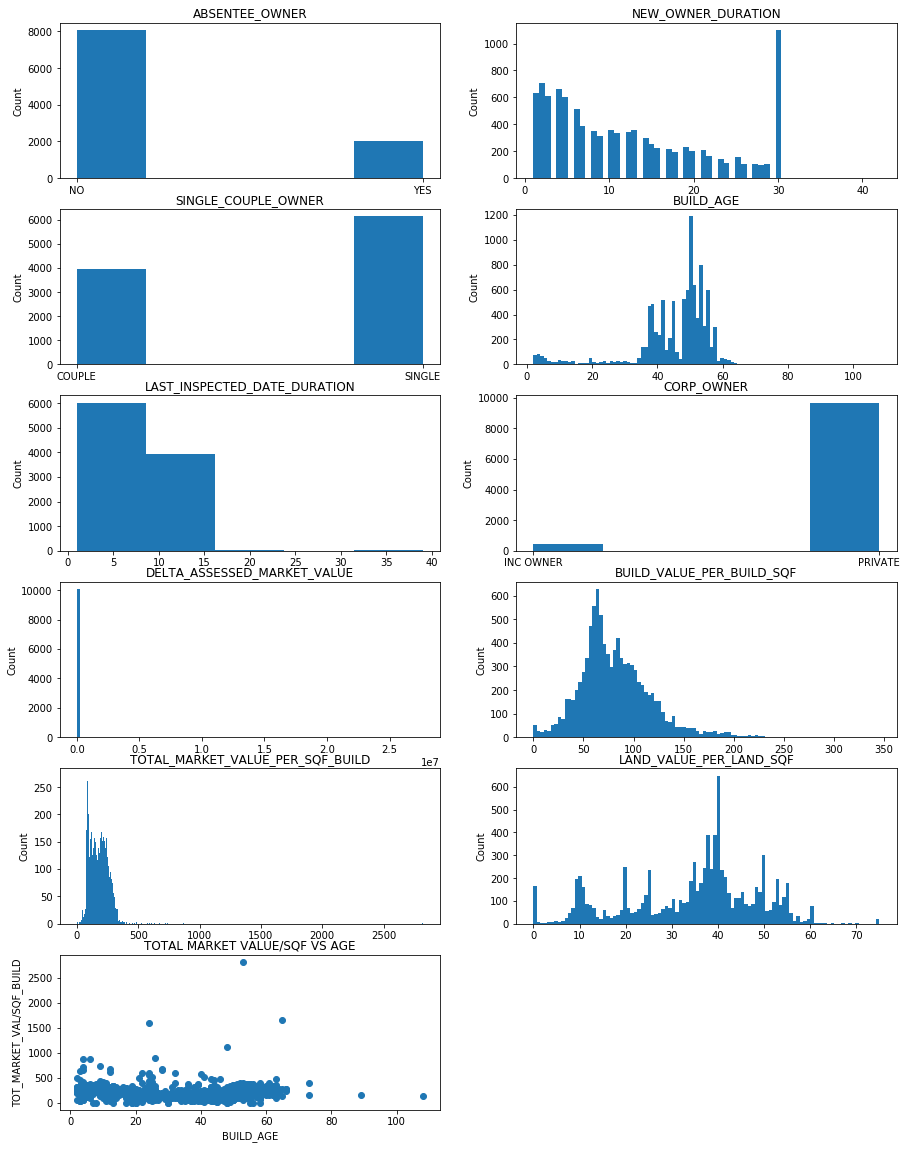

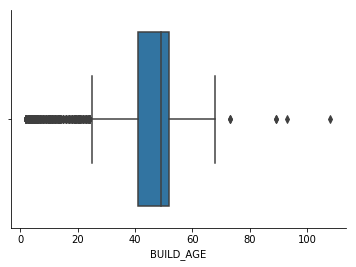

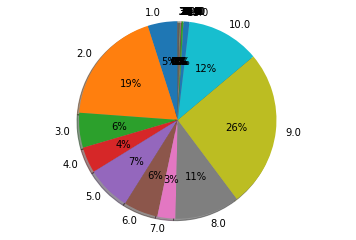

In [2]:
import numpy as np
import pandas as pd  
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
fig=plt.figure()

# Read data
df = pd.DataFrame()
df = pd.read_csv("C:/Users/aath/Dropbox/MAEN/Thankful/Data/Capstone/here/hcad.csv")

# 
#print (df.head(3))

#  subplot(No of plots per row, No. of plots per column, plot no#)
# Need to drop NA values for specific columns so histogram does not return error


fig = plt.figure(figsize=(15, 20))

ax = fig.add_subplot(6,2,1)
df1=df.dropna(subset=['ABSENTEE_OWNER']) 
ax.hist(df['ABSENTEE_OWNER'],bins = 5)
plt.ylabel('Count')
plt.title('ABSENTEE_OWNER')

ax = fig.add_subplot(6,2,2)
df1=df.dropna(subset=['NEW_OWNER_DURATION']) 
ax.hist(df['NEW_OWNER_DURATION'],bins = 60)
plt.ylabel('Count')
plt.title('NEW_OWNER_DURATION')

ax = fig.add_subplot(6,2,3)
df1=df.dropna(subset=['SINGLE_COUPLE_OWNER']) 
ax.hist(df['SINGLE_COUPLE_OWNER'],bins = 5)
plt.ylabel('Count')
plt.title('SINGLE_COUPLE_OWNER')

ax = fig.add_subplot(6,2,4)
df1=df.dropna(subset=['BUILD_AGE']) 
ax.hist(df1['BUILD_AGE'],bins = 100)
plt.ylabel('Count')
plt.title('BUILD_AGE')

ax = fig.add_subplot(6,2,5)
df1=df.dropna(subset=['LAST_INSPECTED_DATE_DURATION']) 
ax.hist(df1['LAST_INSPECTED_DATE_DURATION'],bins = 5)
plt.ylabel('Count')
plt.title('LAST_INSPECTED_DATE_DURATION')

ax = fig.add_subplot(6,2,6)
df1=df.dropna(subset=['CORP_OWNER']) 
ax.hist(df1['CORP_OWNER'],bins = 5)
plt.ylabel('Count')
plt.title('CORP_OWNER')

ax = fig.add_subplot(6,2,7)
df1=df.dropna(subset=['DELTA_ASSESSED_MARKET_VALUE']) 
ax.hist(df1['DELTA_ASSESSED_MARKET_VALUE'],bins = 100)
plt.ylabel('Count')
plt.title('DELTA_ASSESSED_MARKET_VALUE')

ax = fig.add_subplot(6,2,8)
df1=df.dropna(subset=['BUILD_VALUE_PER_BUILD_SQF']) 
ax.hist(df1['BUILD_VALUE_PER_BUILD_SQF'],bins = 100)
plt.ylabel('Count')
plt.title('BUILD_VALUE_PER_BUILD_SQF')

ax = fig.add_subplot(6,2,9)
df1=df.dropna(subset=['TOTAL_MARKET_VALUE_PER_SQF_BUILD']) 
ax.hist(df1['TOTAL_MARKET_VALUE_PER_SQF_BUILD'],bins = 800)
plt.ylabel('Count')
plt.title('TOTAL_MARKET_VALUE_PER_SQF_BUILD')

ax = fig.add_subplot(6,2,10)
df1=df.dropna(subset=['LAND_VALUE_PER_LAND_SQF']) 
ax.hist(df1['LAND_VALUE_PER_LAND_SQF'],bins = 100)
plt.ylabel('Count')
plt.title('LAND_VALUE_PER_LAND_SQF')

# Scatter Building Age vs Total Market Value per SQF
ax = fig.add_subplot(6,2,11)
#df1=df.dropna(subset=['TOTAL_MARKET_VALUE_PER_SQF_BUILD']) 

ax.scatter(df['BUILD_AGE'], df['TOTAL_MARKET_VALUE_PER_SQF_BUILD'])
plt.title('TOTAL MARKET VALUE/SQF VS AGE')
plt.xlabel('BUILD_AGE')
plt.ylabel('TOT_MARKET_VAL/SQF_BUILD')
plt.show()
                              
# Boxplot  
sns.boxplot(df['BUILD_AGE']) 
sns.despine()

# Describe Absentee owner by building age
df1=df.dropna(subset=['BUILD_AGE', 'ABSENTEE_OWNER']) 
df2= df['BUILD_AGE'].groupby([ df['ABSENTEE_OWNER']])
df2.describe()

# Describe Absentee owner by building size
df1=df.dropna(subset=['TOTAL_BUILDING_AREA', 'STATE_CLASS']) 
df2= df['TOTAL_BUILDING_AREA'].groupby([ df['STATE_CLASS']])
df2.describe()

# Describe size of rental propeties by private individualsdf2=df.dropna(subset=['STATE_CLASS']) 
df2=df[(df.STATE_CLASS == 'A1')]
df3= df2['TOTAL_BUILDING_AREA'].groupby([df2['ABSENTEE_OWNER']])
df3.describe()

# Group frequency of inspection by property class type
df1 = df[['STATE_CLASS', 'LAST_INSPECTED_DATE', 'LAST_INSPECTED_DATE_DURATION']]
grouped = df1.groupby(['LAST_INSPECTED_DATE_DURATION'])
df2 = grouped.count()

# Make pie chart showing most frequent inspection]

sizes = df2[['LAST_INSPECTED_DATE']]
labels = list(df2.index)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.0f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()
